In [12]:
import requests
import numpy as np
import pandas as pd 
import geopandas as gpd
from datetime import timedelta
import json

In [54]:
def get_geosphere_data(parameters: list = ["T2M"],
                       start_date: str = '2021-08-01T12:00',
                       end_date: str = '2021-08-02T12:00',
                       bbox: list = [47.45, 14.05, 47.50, 14.10],
                       output_format: str = "geojson"):

    base_url = "https://dataset.api.hub.geosphere.at/v1/grid/historical/inca-v1-1h-1km"
    
    # Constructing the URL with parameters
    parameters_str = "&parameters=".join(parameters)
    url = f"{base_url}?parameters={parameters_str}&start={start_date}&end={end_date}&bbox={','.join(map(str, bbox))}&output_format={output_format}"

    try:
        # Making the HTTP request
        response = requests.get(url)
        response.raise_for_status()  # Raise an exception for bad responses (4xx and 5xx)
        
        # Returning the data as text
        return response.text
    
    except requests.exceptions.RequestException as e:
        # Handling any exceptions that may occur during the request
        print(f"Error: {e}")
        return None


In [100]:

# Example usage:
parameters_list = ["T2M", "RR"]
data = get_geosphere_data(parameters=parameters_list, start_date='2021-08-01T12:00', end_date='2021-08-02T12:00', bbox=[47.45, 14.05, 47.50, 14.10], output_format="geojson")
data_dict = json.loads(data)

In [101]:
data_prep = {"RR": [], "T2M": [], "latitude": [], "longitude": []}
for row in data_dict["features"]:
    lat = row["geometry"]["coordinates"][1]
    lon = row["geometry"]["coordinates"][0]
    temp_mean = np.mean(row["properties"]["parameters"]["T2M"]["data"])
    prec_sum =  np.sum(row["properties"]["parameters"]["RR"]["data"])
    data_prep["latitude"].append(lat)
    data_prep["longitude"].append(lon)
    data_prep["T2M"].append(temp_mean)
    data_prep["RR"].append(prec_sum)

<AxesSubplot: >

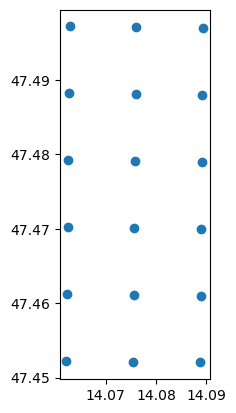

In [102]:
df = pd.DataFrame(data_prep)
gdf = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.longitude, df.latitude), crs="EPSG:4326"
)
gdf.plot()

In [ ]:
# TODO check out how input parameters need to be prepared for FFMC/FWI calculation
# TODO apply FWI calculator to create new columns with FFMC and FWI
# TODO write to script (delete notebook)
# TODO save as csv